In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## New Zealand data

In [ ]:
nz_data = pd.read_feather("/content/drive/MyDrive/Colab Notebooks/LeWagon_Project/PoliticalSpeeches/Data/Corp_NZHoR_V2.feather")
nz_data["terms"] = nz_data["terms"].astype(int)
nz_data = nz_data[nz_data["terms"] >= 50]

nz_data["date"] = pd.to_datetime(nz_data["date"]).dt.year

<ipython-input-4-40b4170cbed3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nz_data["date"] = pd.to_datetime(nz_data["date"]).dt.year


In [ ]:
nz_data["word_n_full"] = nz_data.apply(lambda row: len(row["text"].strip().split()), axis=1)

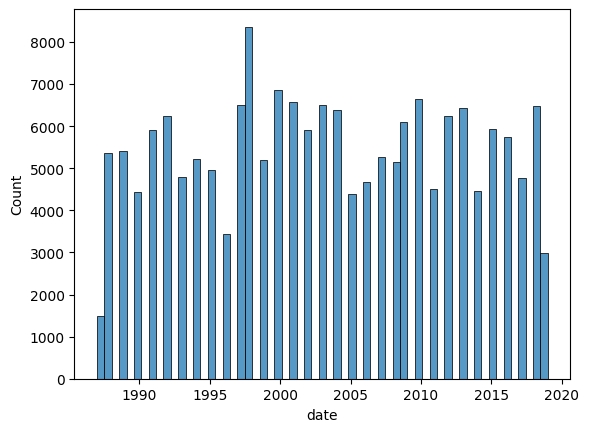

In [ ]:
sns.histplot(nz_data[nz_data["word_n_full"] >= 150]["date"]);
# sns.boxplot(nz_data["terms"]);

party
National                    95819
Labour                      86050
NZ First                    14556
ACT                          9870
Green                        8764
Alliance                     3925
United Future                2495
Maori                        2353
Progressive                   640
United NZ                     595
Mauri Pacific                 283
Independent                   281
NewLabour                     157
Christian Democrat Party      156
Te Tawharau                    88
Mana                           60
Conservative Party             50
Liberal                        45
Christian Heritage Party       24
Future                         22
Mana Wahine                     3
Name: count, dtype: int64


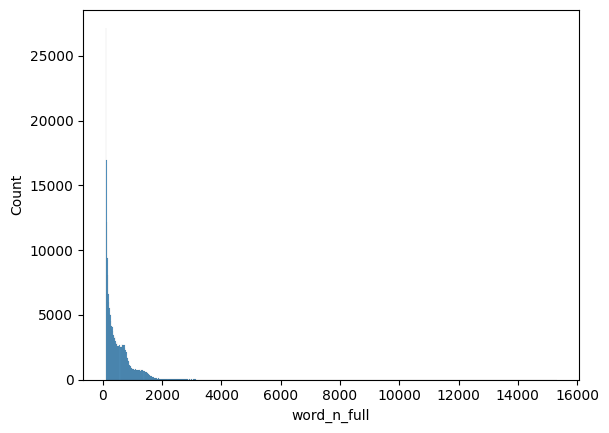

In [ ]:
nz_data_100 = nz_data[nz_data["word_n_full"] >= 100]
print(nz_data_100.value_counts("party"))
sns.histplot(nz_data_100["word_n_full"]);

party
National                    70314
Labour                      68307
NZ First                    11311
Green                        8111
ACT                          8004
Alliance                     3307
United Future                2216
Maori                        2095
United NZ                     526
Progressive                   368
Mauri Pacific                 234
Independent                   229
Christian Democrat Party      136
NewLabour                     134
Te Tawharau                    57
Mana                           55
Conservative Party             43
Liberal                        40
Christian Heritage Party       23
Future                         19
Mana Wahine                     1
Name: count, dtype: int64


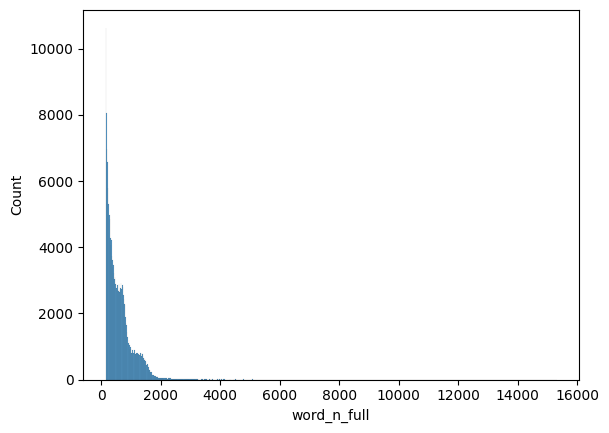

In [ ]:
nz_data_150 = nz_data[nz_data["word_n_full"] >= 150]
print(nz_data_150.value_counts("party"))
sns.histplot(nz_data_150["word_n_full"]);

In [ ]:
nz_data_150.sort_values("terms", ascending=False, inplace=False)["text"].iloc[0]

' It is wonderful to have you in the gallery watching the members of Parliament performing, and it is great that you have turned up here this afternoon. This is the bastion—the Parliament—of our country, and we are certainly getting through our work well this afternoon. It is good to have you here. Kia ora. The question was put that the following amendment in the name of the Hon George Hawkins to clause 9 be agreed to:  to add the following new subclause: (5) The Auckland Council shall also be known as the Auckland Supercity Proposal until 23 June 2010. A party vote was called for on the question, That the amendment be agreed to. Ayes 49 New Zealand Labour 42; Green Party 7. Noes 64 New Zealand National 58; ACT New Zealand 5; United Future 1. Amendment not agreed to. The question was put that the following amendment in the name of the Hon George Hawkins to clause 9 be agreed to: to add the following new subclause: (5) The Auckland Council shall also be known as the Auckland Supercity P

In [ ]:
nz_data_150.sort_values("terms", ascending=False, inplace=False).head()

,date,agenda,speechnumber,speaker,party,party.facts.id,chair,terms,text,parliament,iso3country,word_n_full
723998,2009,LOCAL GOVERNMENT (AUCKLAND REORGANISATION) BI...,1180,PAREKURA HOROMIA,Labour,1049,FALSE,15357,It is wonderful to have you in the gallery wa...,NZ-House_of_Representatives,NZL,15307
222349,1992,ACCIDENT REHABILITATION AND COMPENSATION INSU...,486,MICHAEL CULLEN,Labour,1049,FALSE,10556,against: Elder East Hunt Falloon Maharey Mars...,NZ-House_of_Representatives,NZL,10517
220197,1990,APPROPRIATION BILL (No. 3)---FINANCIAL STATEM...,232,DAVID CAYGILL,Labour,1049,FALSE,9850,"I move, That this Bill be now read a second t...",NZ-House_of_Representatives,NZL,9830
261300,1991,APPROPRIATION BILL (No. 4)---FINANCIAL STATEM...,271,RUTH RICHARDSON,National,1824,FALSE,8871,"I move, That this Bill be now read a second t...",NZ-House_of_Representatives,NZL,8853
83736,1989,APPROPRIATION BILL (No. 4)---FINANCIAL STATEM...,275,DAVID CAYGILL,Labour,1049,FALSE,8593,"I move, That this Bill be now read a second t...",NZ-House_of_Representatives,NZL,8573


## UK data

In [3]:
uk_data = pd.read_feather("/content/drive/MyDrive/Colab Notebooks/LeWagon_Project/PoliticalSpeeches/Data/Corp_HouseOfCommons_V2.feather")

In [4]:
uk_data["terms"] = uk_data["terms"].astype(int)
uk_data = uk_data[uk_data["terms"] >= 50]
uk_data["word_n_full"] = uk_data.apply(lambda row: len(row["text"].strip().split()), axis=1)
uk_data["date"] = pd.to_datetime(uk_data["date"]).dt.year

In [5]:
uk_data["word_n_full"] = uk_data.apply(lambda row: len(row["text"].strip().split()), axis=1)

In [12]:
uk_data_150 = uk_data[uk_data["word_n_full"] >= 150]

In [22]:
uk_data_150.groupby("party").size().reset_index(name="n_speeches").\
sort_values("n_speeches", ascending=False).reset_index(drop=True).iloc[9:]

,party,n_speeches
9,GPEW,475
10,other,400
11,APNI,125
12,Change UK,119
13,UPUP,90
14,UKUP,89
15,UKIP,76
16,Respect,73
17,SDP,69
18,The Independents,11


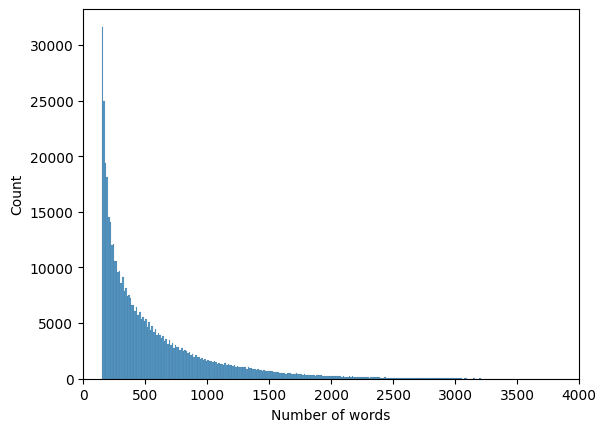

In [25]:
sns.histplot(uk_data_150["word_n_full"])
plt.xlim(0, 4000)
plt.xlabel('Number of words');

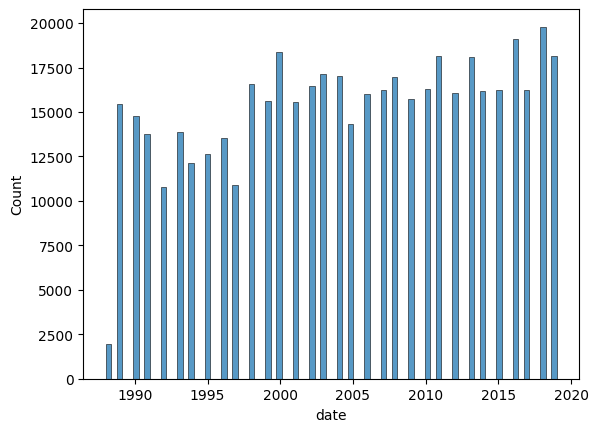

In [ ]:
sns.histplot(uk_data_150["date"]);

In [ ]:
uk_data_150.sort_values("word_n_full", ascending=False, inplace=False)["text"].iloc[0]

'It would be churlish of me not to offer a dollop of sympathy to my hon. Friend the Minister for Home Affairs and Devolution, Scottish Office, because he comes now to a debate on a subject on which there have already been 11 Adjournment debates. I know very well that he is responsible for an important White Paper tomorrow, but parliamentary good fortune seldom smiles on us. It is my good fortune, however, to have the time to deploy yet again an aspect of the case that is Lockerbie. I offer no apology for doing so, however, because the matter is not trivial. It is extremely important, not only for the relatives who want the truth about the death of their loved ones on 21 December 1988, but from the point of view of our country. Before charges were laid, my hon. Friend the Member for Clydesdale (Mr. Hood), who is present, several others and I went to Libya. Apart from anything else, we saw the importance of Libya to the British economy. It is an Arab country which is placing massive orde

In [7]:
uk_data_150.sort_values("word_n_full", ascending=False, inplace=False).head()

,date,agenda,speechnumber,speaker,party,party.facts.id,chair,terms,text,parliament,iso3country,word_n_full
492876,1997,Lockerbie [Orders Of The Day],343,Tam Dalyell,Lab,1516,FALSE,10936,It would be churlish of me not to offer a doll...,UK-HouseOfCommons,GBR,10936
817499,2003,Budget Statement,114,Gordon Brown,Lab,1516,FALSE,9069,It is half a century since a Budget has been p...,UK-HouseOfCommons,GBR,9069
759583,2002,Budget Statement,105,Gordon Brown,Lab,1516,FALSE,8957,"Five years ago, this Government's first Budget...",UK-HouseOfCommons,GBR,8957
986519,2006,None,139,Gordon Brown,Lab,1516,FALSE,8826,It is a great honour and privilege to deliver ...,UK-HouseOfCommons,GBR,8834
1299630,2011,Financial Statement,147,George Osborne,Con,1567,FALSE,8725,Last year's emergency Budget was about rescuin...,UK-HouseOfCommons,GBR,8725


In [8]:
uk_data_150.shape

(490090, 12)